In [1]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
gapminder_path = 'gapminder_dataset.csv'
iris_path = 'iris_dataset.csv'

gapminder_data = pd.read_csv(gapminder_path)
iris_data = pd.read_csv(iris_path)

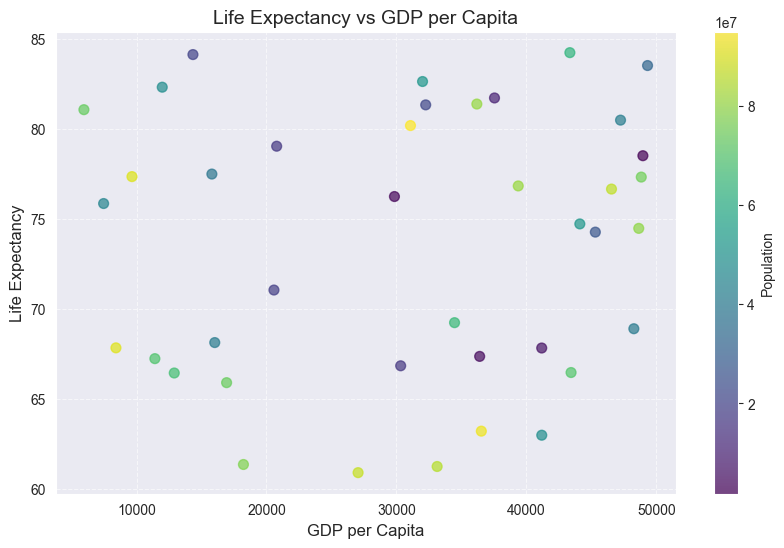

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib: Gapminder Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    gapminder_data['GDP per Capita'], 
    gapminder_data['Life Expectancy'], 
    c=gapminder_data['Population'], 
    cmap='viridis', alpha=0.7, s=50
)
plt.colorbar(label='Population')
plt.title('Life Expectancy vs GDP per Capita', fontsize=14)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

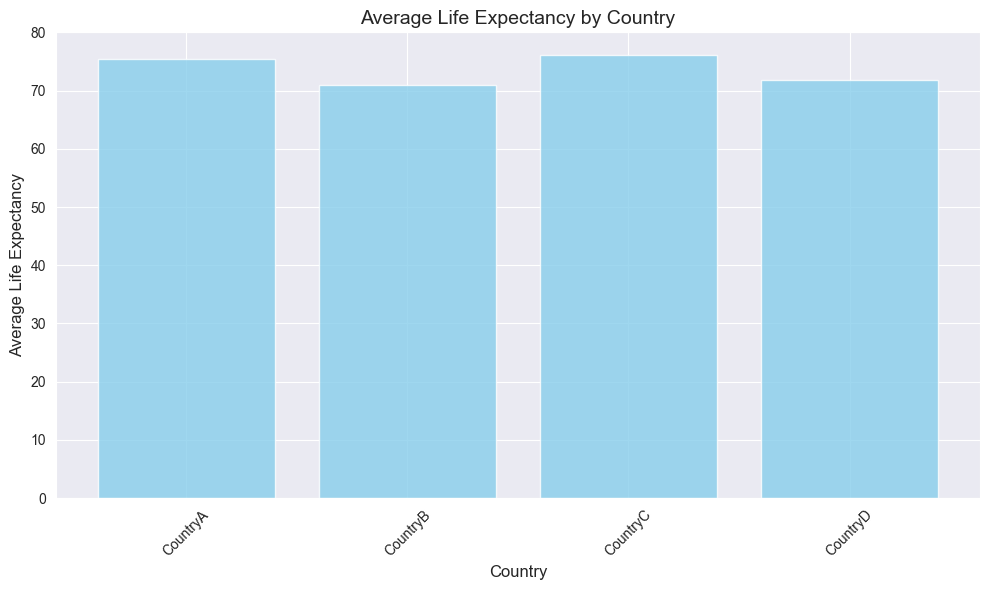

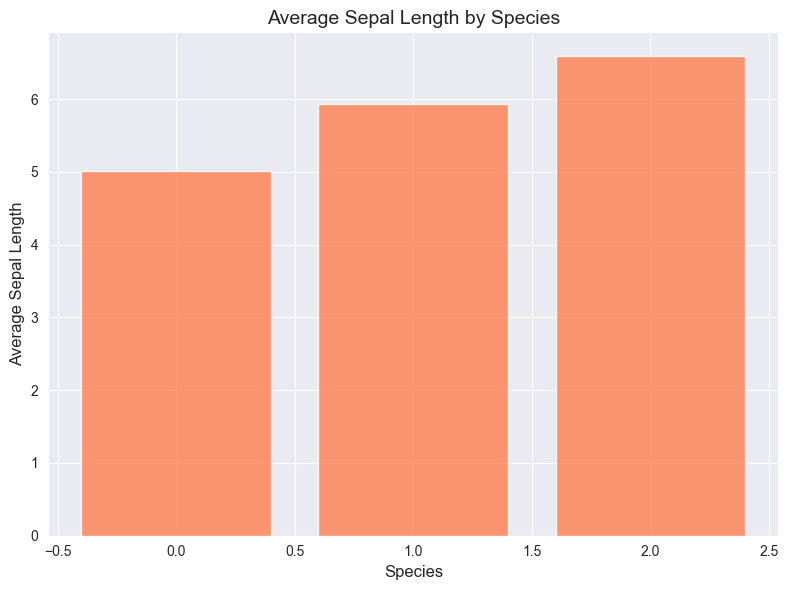

In [4]:
# matplotlib bar chart: 

# average life expectancy by country
gapminder_avg = gapminder_data.groupby('Country')['Life Expectancy'].mean()
plt.figure(figsize=(10, 6))
plt.bar(gapminder_avg.index, gapminder_avg.values, color='skyblue', alpha=0.8)
plt.title('Average Life Expectancy by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Life Expectancy', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# average sepal length by species
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
species_avg = iris_data.groupby('species')['sepal_length'].mean()
plt.figure(figsize=(8, 6))
plt.bar(species_avg.index, species_avg.values, color='coral', alpha=0.8)
plt.title('Average Sepal Length by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Average Sepal Length', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/wb/51lm9gcs6fs2fm_24xh6rp_00000gn/T/ipykernel_5503/1978003879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gapminder_avg.index, y=gapminder_avg.values, palette='viridis')


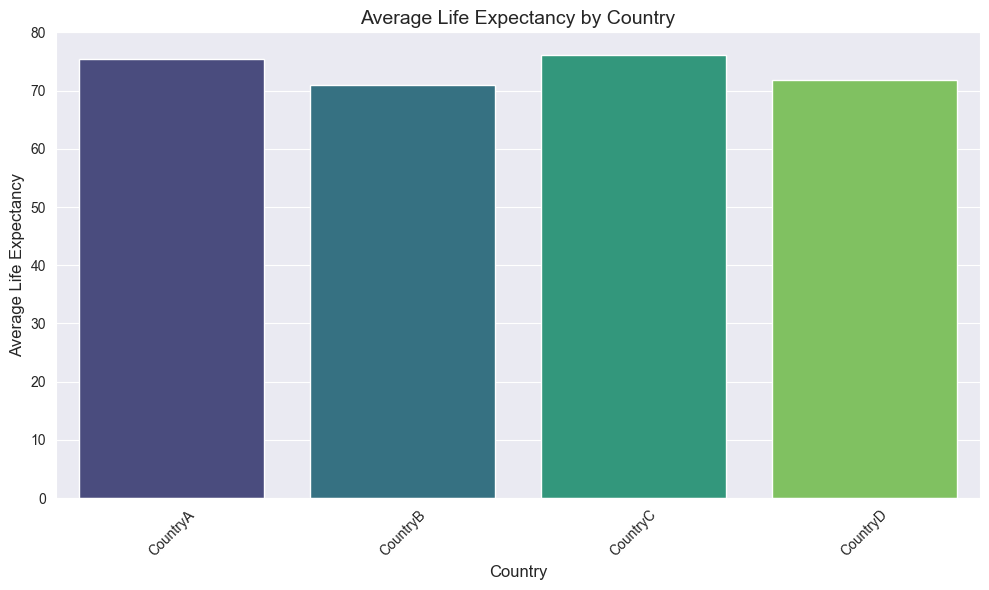

/var/folders/wb/51lm9gcs6fs2fm_24xh6rp_00000gn/T/ipykernel_5503/1978003879.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_avg.index, y=species_avg.values, palette='mako')


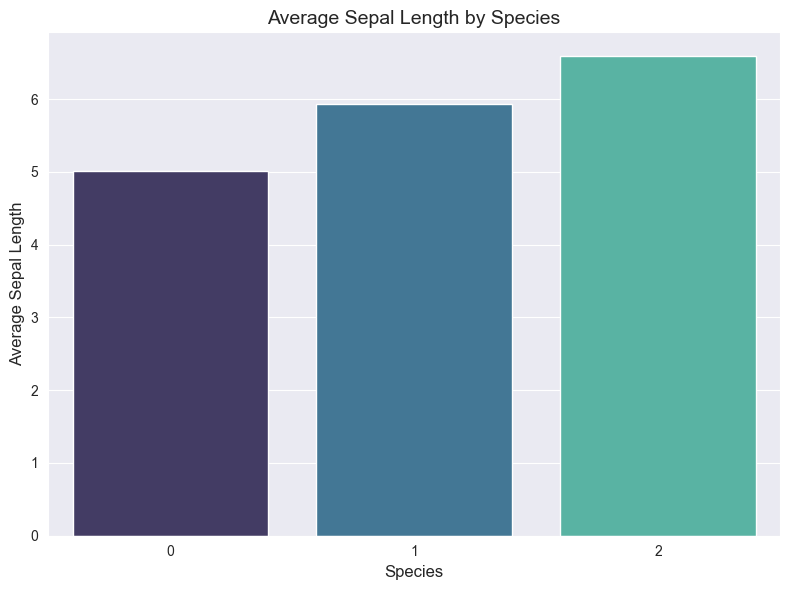

In [5]:
# seaborn bar chart: 

# average life expectancy by country
plt.figure(figsize=(10, 6))
sns.barplot(x=gapminder_avg.index, y=gapminder_avg.values, palette='viridis')
plt.title('Average Life Expectancy by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Life Expectancy', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# average sepal length by species
plt.figure(figsize=(8, 6))
sns.barplot(x=species_avg.index, y=species_avg.values, palette='mako')
plt.title('Average Sepal Length by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Average Sepal Length', fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
import matplotlib.animation as animation
import numpy as np
%matplotlib notebook

if 'Continent' not in gapminder_data.columns:
    np.random.seed(42)  # Simulate continents for demonstration
    continents = ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
    gapminder_data['Continent'] = np.random.choice(continents, len(gapminder_data))

years = sorted(gapminder_data['Year'].unique())
continents = gapminder_data['Continent'].unique()
palette = sns.color_palette("Set2", len(continents))
continent_colors = dict(zip(continents, palette))

fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('darkgrid')

def update(year):
    ax.clear()
    year_data = gapminder_data[gapminder_data['Year'] == year]
    
    # bubble plot
    for continent in continents:
        continent_data = year_data[year_data['Continent'] == continent]
        ax.scatter(
            continent_data['GDP per Capita'],
            continent_data['Life Expectancy'],
            s=continent_data['Population'] / 1e6,
            c=[continent_colors[continent]] * len(continent_data),
            label=continent,
            alpha=0.6,
            edgecolors='w',
            linewidth=0.5
        )
    ax.set_title(f'Gapminder: Life Expectancy vs GDP (Year: {year})', fontsize=16)
    ax.set_xlabel('GDP per Capita', fontsize=12)
    ax.set_ylabel('Life Expectancy', fontsize=12)
    ax.set_xlim(0, gapminder_data['GDP per Capita'].max() * 1.1)
    ax.set_ylim(0, gapminder_data['Life Expectancy'].max() * 1.1)
    ax.legend(title='Continent', loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.5)

ani = animation.FuncAnimation(fig, update, frames=years, repeat=False, interval=1000)
plt.show()

<IPython.core.display.Javascript object>